In [8]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig=plt.figure()
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Read all data from source
df = pd.DataFrame()
df = pd.read_csv("C:/Users/aath/Dropbox/MAEN/Thankful/Data/Capstone/here/hcad.csv")

# Aggregate categorical variables to group by State Class type

df1 = df[['ACCOUNT','STATE_CLASS', 'LAST_INSPECTED_DATE', 'LAST_INSPECTED_DATE_DURATION', 'BUILD_AGE', 'MAP_FACET', 'YR_IMPR']]


## These are all relevant variables
ACCOUNT, MAP_FACET, YR_IMPR, TOTAL_BUILDING_AREA, TOTAL_LAND_AREA, LAND_VALUE, IMPROVEMENT_VALUE, ASSESSED_VALUE, TOTAL_APPRAISED_VALUE
TOTAL_MARKET_VALUE, DELTA_ASSESSED_MARKET_VALUE, DELTA_ASSESSED_MARKET_VALUE_RATIO, BUILD_VALUE_PER_BUILD_SQF, TOTAL_MARKET_VALUE_PER_SQF_BUILD, LAND_VALUE_PER_LAND_SQF, LAND_VALUE_PER_BUILD_SQF, NEW_OWNER_DATE, BUILD_AGE
NEW_OWNER_DURATION, LAST_INSPECTED_DATE, LAST_INSPECTED_DATE_DURATION, ABSENTEE_OWNER, SINGLE_COUPLE_OWNER, CORP_OWNER
RESIDENTIAL_COMMERCIAL


# Plot no. 1: Frequency counts of class types

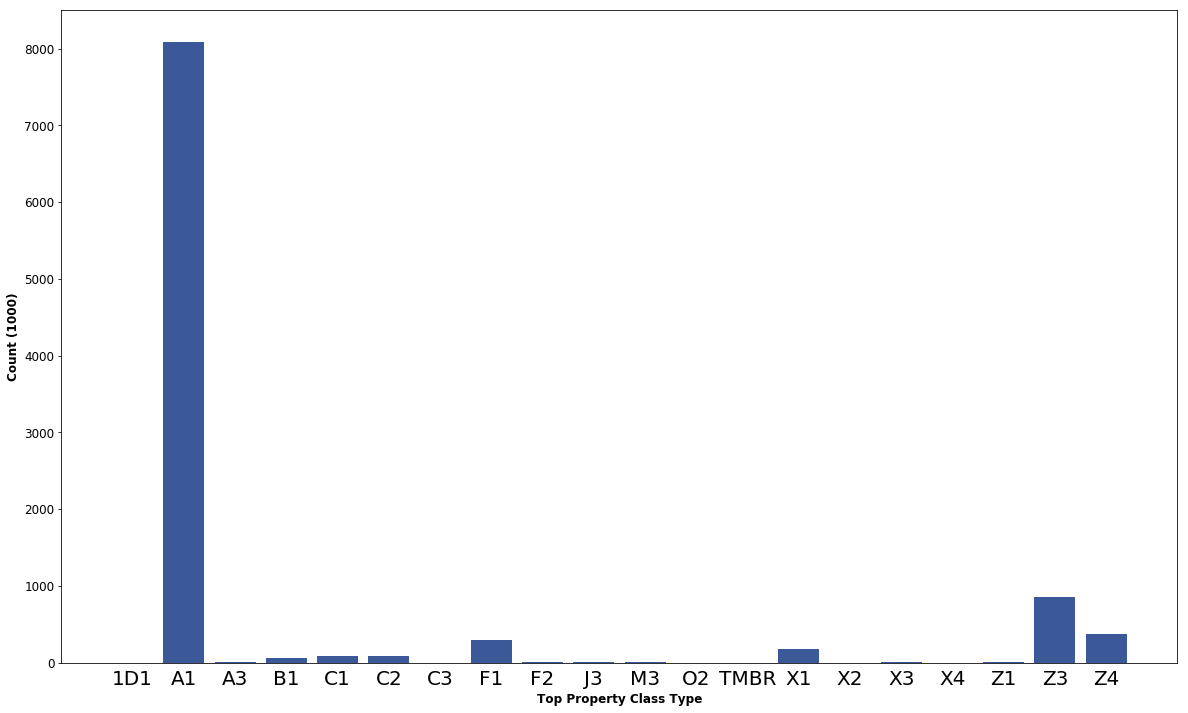

In [9]:
                                            # PLOT No. 1
grouped = df1.groupby(['STATE_CLASS'])

# Count frequency
df2 = grouped.count()

fig = plt.figure(figsize=(15, 20))


# Get column names of each counted variable
col_location = df2.columns.get_loc('ACCOUNT')
df3= df2.iloc[:,col_location]

# Get Category names for plot
labels = list(df3.index)

fig, ax1 = plt.subplots(figsize=(20,12))

rects1 = ax1.bar(range(20), df3, align='center',color='#3b5998')

# Set spines to be invisible
# for spine in ax1.spines.values():
#     spine.set_visible(False)

# Format ticks and labels
plt.xticks(range(20), labels,fontsize=20)
for tic in ax1.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
plt.yticks(fontsize=12)
plt.xlabel('Top Property Class Type',fontsize=12,
fontweight='semibold')
plt.ylabel('Count (1000)',fontsize=12,fontweight='semibold')

plt.show()
                                                


# Map facet requency = Geographic density

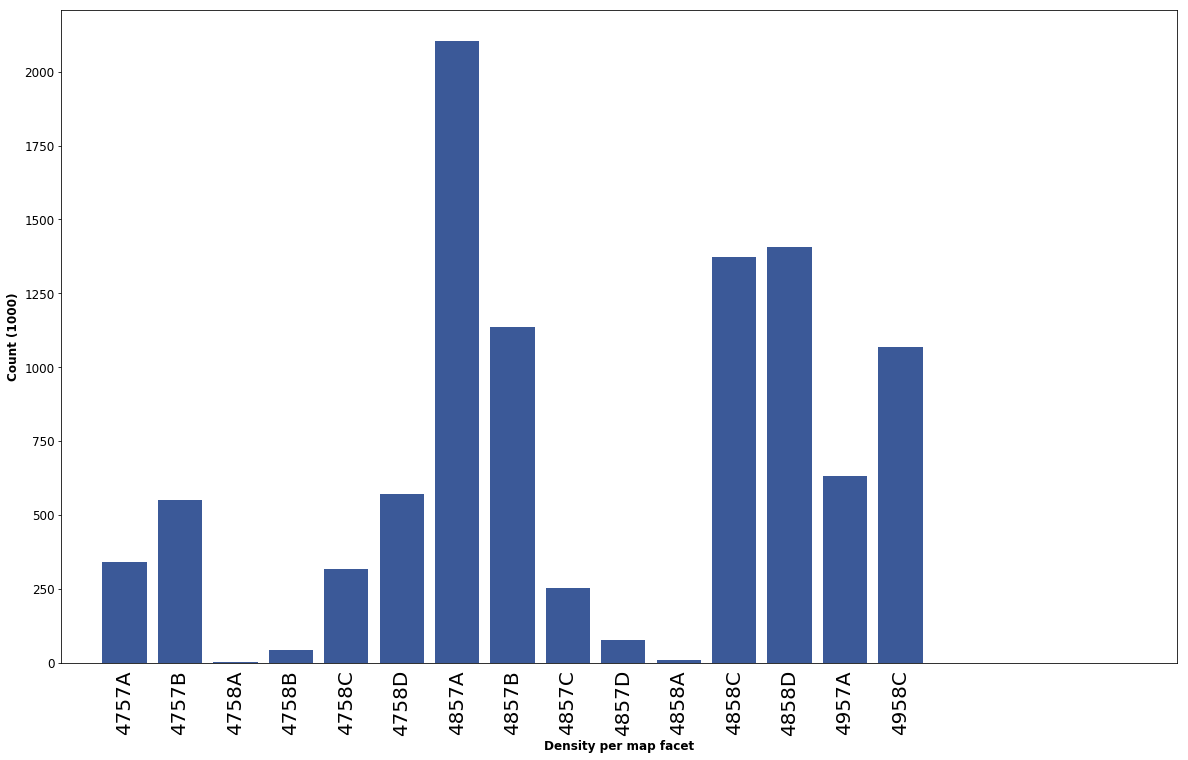

In [10]:
grouped = df1.groupby(['MAP_FACET'])

# Count frequency
df2 = grouped.count()

fig = plt.figure(figsize=(15, 20))


# Get column names of each counted variable
col_location = df2.columns.get_loc('ACCOUNT')
df3= df2.iloc[:,col_location]

# Get Category names for plot
labels = list(df3.index)

fig, ax2 = plt.subplots(figsize=(20,12))

rects1 = ax2.bar(range(15), df3, align='center',color='#3b5998')

# Set spines to be invisible
for spine in ax1.spines.values():
    spine.set_visible(False)

# Format ticks and labels
plt.xticks(range(20), labels,fontsize=20, rotation=90)
for tic in ax2.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
plt.yticks(fontsize=12)
plt.xlabel('Density per map facet',fontsize=12, 
fontweight='semibold')
plt.ylabel('Count (1000)',fontsize=12,fontweight='semibold')

plt.show()

# Class types per map facet pivot table

In [77]:
# Get a sub section of main imported df
df1 = df[['STATE_CLASS', 'MAP_FACET']]

# Clean for NAs
df2 = df1.dropna()

# Add a column of 1s to be used as dummy variable

df2['ONES'] = pd.Series([1 for x in range(len(df2.index))])

# Clean for NAs once more
df3=df2.dropna(subset=['ONES']) 

#
#table = pd.pivot_table(df3,index=["MAP_FACET"], values=["ONES"],
#               columns=["STATE_CLASS"],aggfunc=np.sum, fill_value=0,margins=True)

table = pd.pivot_table(df3,index=["STATE_CLASS"], values=["ONES"],
               columns=["MAP_FACET"],aggfunc=np.sum, fill_value=0,margins=True)

table

C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


ONES                                                          \
MAP_FACET    4757A  4757B 4758A 4758B  4758C  4758D   4857A   4857B  4857C   
STATE_CLASS                                                                  
A1           320.0  359.0   0.0   0.0  254.0  458.0  1719.0  1104.0  252.0   
A3             1.0    0.0   0.0   0.0    0.0    1.0     0.0     1.0    0.0   
B1             1.0   17.0   0.0   0.0    0.0   17.0     5.0     4.0    0.0   
C1             0.0    3.0   0.0  17.0    1.0    8.0     0.0     4.0    2.0   
C2             4.0    0.0   0.0  11.0   14.0   20.0     4.0     1.0    0.0   
F1            11.0    2.0   0.0   0.0   37.0   33.0    66.0    14.0    0.0   
F2             0.0    0.0   0.0   3.0    0.0    0.0     0.0     0.0    0.0   
J3             0.0    2.0   0.0   3.0    0.0    0.0     0.0     0.0    0.0   
O2             0.0    0.0   0.0   0.0    0.0    0.0     0.0     2.0    0.0   
TMBR           0.0    0.0   0.0   0.0    0.0    1.0     0.0     0.0    0.0   
X1             1.0    4.0   1.0   7.0    4.0    8.0     1.0     4.0    0.0   
X2             0.0    0.0   0.0   0.0    0.0    0.0     0.0     0.0    0.0   
X3             0.0    1.0   0.0   0.0    0.0    1.0     1.0     2.0    0.0   
X4             0.0    0.0   0.0   1.0    0.0    0.0     0.0     0.0    0.0   
Z1             0.0    0.0   0.0   0.0    0.0    0.0     4.0     0.0    0.0   
Z3             0.0  145.0   0.0   0.0    0.0    0.0    94.0     0.0    0.0   
Z4             0.0    0.0   0.0   0.0    0.0    0.0   198.0     0.0    0.0   
All          338.0  533.0   1.0  42.0  310.0  547.0  2092.0  1136.0  254.0   

                                                                
MAP_FACET   4857D 4858A   4858C   4858D  4957A   4958C     All  
STATE_CLASS                                                     
A1           75.0   0.0   967.0  1348.0  600.0   556.0  8012.0  
A3            0.0   0.0     1.0     0.0    1.0     2.0     7.0  
B1            0.0   0.0     4.0     2.0    0.0     0.0    50.0  
C1            0.0   0.0     4.0    15.0   12.0     7.0    73.0  
C2            0.0   1.0     5.0     5.0    1.0     1.0    67.0  
F1            1.0   4.0    42.0    26.0   11.0    10.0   257.0  
F2            0.0   3.0     0.0     0.0    0.0     0.0     6.0  
J3            0.0   0.0     0.0     0.0    0.0     1.0     6.0  
O2            0.0   0.0     0.0     0.0    0.0     0.0     2.0  
TMBR          0.0   0.0     0.0     0.0    0.0     0.0     1.0  
X1            0.0   2.0     7.0     2.0    1.0     2.0    44.0  
X2            0.0   0.0     0.0     0.0    2.0     0.0     2.0  
X3            0.0   0.0     3.0     0.0    1.0     0.0     9.0  
X4            0.0   0.0     1.0     0.0    0.0     0.0     2.0  
Z1            0.0   0.0     0.0     0.0    0.0     0.0     4.0  
Z3            0.0   0.0   327.0     0.0    0.0   285.0   851.0  
Z4            0.0   0.0     0.0     0.0    0.0   180.0   378.0  
All          76.0  10.0  1361.0  1398.0  629.0  1044.0  9771.0

In [82]:
g = table.query('STATE_CLASS == ["A1", "F1", "Z3", "Z4"]')

In [85]:
#g.append(g.sum(numeric_only=True), ignore_index=True)
total = g.apply(np.sum)